In [5]:
# statsmodels -> Statistica (Econometria, ) 

# sklearn -> Modelos preditivos (bom modelo que mostrou bom resultado no passado, ) 



In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [7]:
# Import data
df = pd.read_csv('./data/data.csv')
# Source: https://www.kaggle.com/CooperUnion/cardataset
# Remove null engine hp 
df = df[~df['Engine HP'].isnull()]
df = df[~df['Engine Cylinders'].isnull()]

#### Suppose there is a company that sells tickets to shows and our goal is to find out how is their pricing methodology. We have been told that the price is a function that depends only on age. We were able to buy 4 tickets online for people with different ages.

In [8]:
ages = [15, 20, 30, 34, 50, 64,  66, 77, 80, 85, 90]
prices= [130, 140, 160, 168, 200, 228, 133.0, 138.5, 140.0, 142.5, 145.0]

# transform = lambda x: 100 + (2 * x) if x < 65 else 100 + (x * 0.5)
# prices = []
# for i in ages:
#     prices.append(transform(i))

df = pd.DataFrame(list(zip(prices, ages)), columns=['price', 'age'])
df

,price,age
0,130.0,15
1,140.0,20
2,160.0,30
3,168.0,34
4,200.0,50
5,228.0,64
6,133.0,66
7,138.5,77
8,140.0,80
9,142.5,85


In [9]:
prices

[130, 140, 160, 168, 200, 228, 133.0, 138.5, 140.0, 142.5, 145.0]

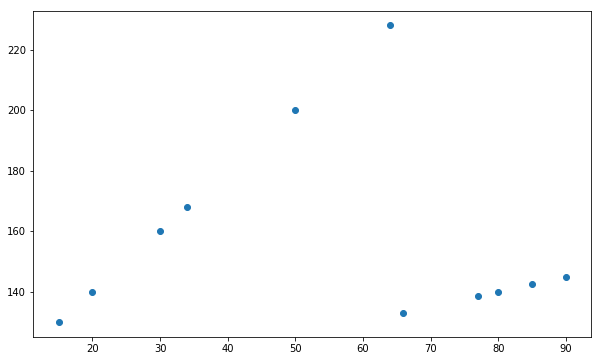

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['age'], y = df['price'])

Intercept: 158.004181305359
Coefs [('age', -0.02135187292790346)]
R2 score: 0.00034902129143743466


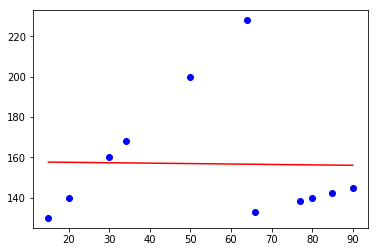

In [11]:
x = df[['age']]
y = df['price']

model = LinearRegression(fit_intercept=True)
model.fit(x, y)

# Create predict using our model and the values in X:
y_hat = model.predict(x)

# Plot those predicted values, which is the same as plotting the model:
plt.plot(x, y,  'bo')
plt.plot(x, y_hat, 'r');

print('Intercept:', model.intercept_) 
print('Coefs', list(zip(x.columns, model.coef_)))

# R2 score
print('R2 score:', r2_score(y, y_hat))

In [12]:
# Lets Create a categorical Variable to indicate that age is over 65
df['is_over_65'] = df['age'] > 65

In [13]:
df

,price,age,is_over_65
0,130.0,15,False
1,140.0,20,False
2,160.0,30,False
3,168.0,34,False
4,200.0,50,False
5,228.0,64,False
6,133.0,66,True
7,138.5,77,True
8,140.0,80,True
9,142.5,85,True


Intercept: 108.57333594170298
Coefs [('age', 1.7584975791069581), ('is_over_65', -108.74974323861686)]
R2 score: 0.9352602066455488


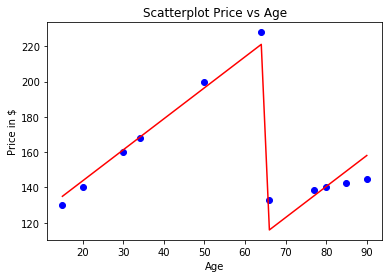

In [14]:
x = df[['age', 'is_over_65']]
y = df['price']

model = LinearRegression(fit_intercept=True)
model.fit(x, y)

# Create predict using our model and the values in X:
y_hat = model.predict(x)

# Plot those predicted values, which is the same as plotting the model:
plt.plot(x['age'], y,  'bo')
plt.plot(x['age'], y_hat, 'r');
plt.title("Scatterplot Price vs Age")
plt.xlabel("Age")
plt.ylabel("Price in $")

print('Intercept:', model.intercept_) 
print('Coefs', list(zip(x.columns, model.coef_)))

# R2 score
print('R2 score:', r2_score(y, y_hat))

## Regression equation

${Y}_{i} = {108.57} +  {1.758}X_{i1} - {108.74}X_{i2} + {\varepsilon}$

${X}_{i1}$ = Age<br  />
${X}_{i2}$ = is_over_65

# Interactive Features

Interative features is a way to create a feature based on the interaction of two or more features.

_When features interact with each other in a prediction model, the prediction cannot be expressed as the sum of the feature effects, because the effect of one feature depends on the value of the other feature. Aristotle's predicate "The whole is greater than the sum of its parts" applies in the presence of interactions._
[Sorce: interpretable-ml-book](https://christophm.github.io/interpretable-ml-book/interaction.html)

In the example below these features alone are only different types of food, but when we multiply them we get a totaly different meaning. The `guacamole` feature will allow the model to the model to interpret the interaction between these featues that would not be possible otherwise.
```python
df['guacamole'] = df['avocado'] * df['tomato'] * df['lemon'] * df['cilantro'] * df['salt'] * df['onions']
```

### Now lets create a new feature ( Age * is_over_65)

In [15]:
df['age_x_dummy'] = df['age'] * df['is_over_65']
df

,price,age,is_over_65,age_x_dummy
0,130.0,15,False,0
1,140.0,20,False,0
2,160.0,30,False,0
3,168.0,34,False,0
4,200.0,50,False,0
5,228.0,64,False,0
6,133.0,66,True,66
7,138.5,77,True,77
8,140.0,80,True,80
9,142.5,85,True,85


In [16]:
df.corr()

,price,age,is_over_65,age_x_dummy
price,1.000000,-0.018682,-0.525900,-0.508301
age,-0.018682,1.000000,0.849565,0.870526
is_over_65,-0.525900,0.849565,1.000000,0.990609
age_x_dummy,-0.508301,0.870526,0.990609,1.000000


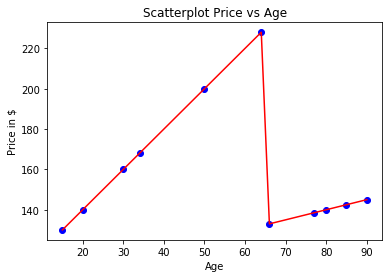

Intercept: 100.00000000000006
Coefs [('age', 1.9999999999999987), ('age_x_dummy', -1.5)]
R2 score: 1.0


In [17]:
x = df[['age','age_x_dummy']]
y = df['price']

model = LinearRegression(fit_intercept=True)
model.fit(x, y)

# Create predict using our model and the values in X:
y_hat = model.predict(x)

# Plot those predicted values, which is the same as plotting the model:
plt.plot(df['age'], y,  'bo', label='line 1')
plt.plot(df['age'], y_hat, 'r');
plt.title("Scatterplot Price vs Age")
plt.xlabel("Age")
plt.ylabel("Price in $")
plt.show()

print('Intercept:', model.intercept_) 
print('Coefs', list(zip(x.columns, model.coef_)))

# R2 score
print('R2 score:', r2_score(y, y_hat))

## Regression equation

${Y}_{i} = {100} +  {2}X_{i1} - {1.5}X_{i2} + {\varepsilon}$

${X}_{i1}$ = Age<br  />
${X}_{i2}$ = Age_x_is_over_65

In [18]:
df

,price,age,is_over_65,age_x_dummy
0,130.0,15,False,0
1,140.0,20,False,0
2,160.0,30,False,0
3,168.0,34,False,0
4,200.0,50,False,0
5,228.0,64,False,0
6,133.0,66,True,66
7,138.5,77,True,77
8,140.0,80,True,80
9,142.5,85,True,85


## Polinomial Features

In [19]:
# Removing column
del df['age_x_dummy']

In [20]:
df.head()

,price,age,is_over_65
0,130.0,15,False
1,140.0,20,False
2,160.0,30,False
3,168.0,34,False
4,200.0,50,False


In [22]:
poly = PolynomialFeatures(include_bias=False)
features = ['age', 'is_over_65']
X = df[features]
y = df['price']

X_poly = poly.fit_transform(X)

df_with_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names(features))

In [23]:
df_with_poly

,age,is_over_65,age^2,age is_over_65,is_over_65^2
0,15.0,0.0,225.0,0.0,0.0
1,20.0,0.0,400.0,0.0,0.0
2,30.0,0.0,900.0,0.0,0.0
3,34.0,0.0,1156.0,0.0,0.0
4,50.0,0.0,2500.0,0.0,0.0
5,64.0,0.0,4096.0,0.0,0.0
6,66.0,1.0,4356.0,66.0,1.0
7,77.0,1.0,5929.0,77.0,1.0
8,80.0,1.0,6400.0,80.0,1.0
9,85.0,1.0,7225.0,85.0,1.0


In [24]:
model = LinearRegression(fit_intercept=True)
model.fit(X_poly, y)
y_hat = model.predict(X_poly)
print('R2 score:', r2_score(y, y_hat))

R2 score: 1.0


# Scaling


# ${x- \mu \over \sigma}$

In [25]:
df

,price,age,is_over_65
0,130.0,15,False
1,140.0,20,False
2,160.0,30,False
3,168.0,34,False
4,200.0,50,False
5,228.0,64,False
6,133.0,66,True
7,138.5,77,True
8,140.0,80,True
9,142.5,85,True


In [31]:
(15- age_mean)/25.84

-1.5690965381367858

In [29]:
df['age'].std(ddof=0)

25.846974981658477

In [32]:
age_mean = df['age'].mean()
((df['age'] - age_mean) / df['age'].std(ddof=0))

0    -1.568673
1    -1.375227
2    -0.988334
3    -0.833577
4    -0.214549
5     0.327100
6     0.404478
7     0.830060
8     0.946128
9     1.139574
10    1.333020
Name: age, dtype: float64

In [35]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=features)

C:\Users\berku\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\berku\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [36]:
df_scaled

,age,is_over_65
0,-1.568673,-0.912871
1,-1.375227,-0.912871
2,-0.988334,-0.912871
3,-0.833577,-0.912871
4,-0.214549,-0.912871
5,0.327100,-0.912871
6,0.404478,1.095445
7,0.830060,1.095445
8,0.946128,1.095445
9,1.139574,1.095445


In [37]:
model = LinearRegression(fit_intercept=True)
model.fit(X_scaled, y)
y_hat = model.predict(X_scaled)
print('R2 score:', r2_score(y, y_hat))

R2 score: 0.9352602066455488


# Example 2 Using Logarithmic Tranansformation on Y

https://dev.to/rokaandy/logarithmic-transformation-in-linear-regression-models-why-when-3a7c

In [14]:
import statsmodels.api as sm

C:\Users\berku\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [15]:
# Import data
df = pd.read_csv('./data/data.csv')
# Source: https://www.kaggle.com/CooperUnion/cardataset

# Remove null engine hp 
df = df[~df['Engine HP'].isnull()]
df = df[~df['Engine Cylinders'].isnull()]

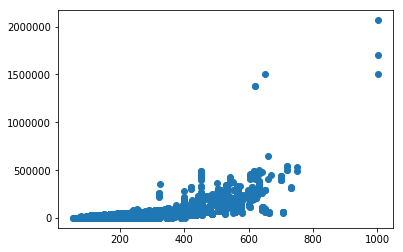

In [16]:
features = ['Engine HP']
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x = df['Engine HP'], y = df['MSRP'])

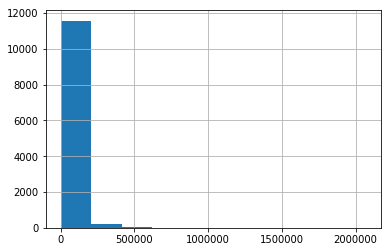

In [17]:
df['MSRP'].hist()

In [18]:
df['log_price'] = np.log(df['MSRP'])

In [19]:
df[['log_price', 'MSRP']]

,log_price,MSRP
0,10.739327,46135
1,10.612754,40650
2,10.500949,36350
3,10.290449,29450
4,10.448715,34500
...,...,...
11909,10.739002,46120
11910,10.945000,56670
11911,10.832102,50620
11912,10.838011,50920


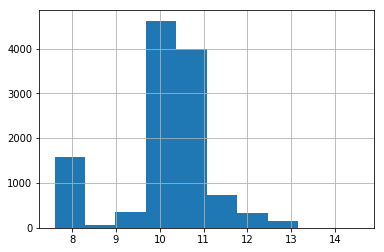

In [20]:
df['log_price'].hist()

Intercept: -50651.97908896372
Coef [365.62160089]
R2 score: 0.43859963034081983


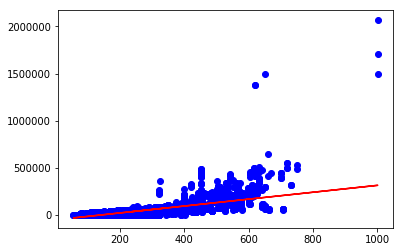

In [21]:
# Model using current MSRP
x = df[['Engine HP']]
y = df['MSRP']

model = LinearRegression(fit_intercept=True)
model.fit(x, y)

# Create predict using our model and the values in X:
y_hat = model.predict(x)

# Plot those predicted values, which is the same as plotting the model:
plt.plot(x, y,  'bo')
plt.plot(x, y_hat, 'r');

print('Intercept:', model.intercept_) 
print('Coef', model.coef_)

# R2 score
print('R2 score:', r2_score(y, y_hat))

Total absolute error 247549316.0749948


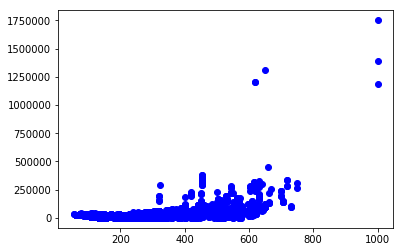

In [22]:
errors = abs(y - y_hat)
print('Total absolute error', sum(errors))
plt.plot(x, errors,  'bo')

In [23]:
np.exp(y_hat)

C:\Users\berku\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


array([inf, inf, inf, ..., inf, inf, inf])

R2 score: 0.46226783005958394


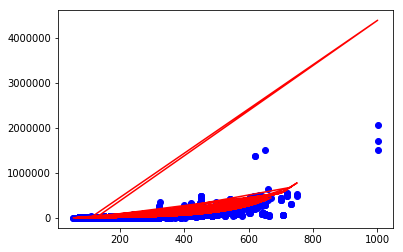

In [24]:
# Model using current Log of MSRP

x = df[['Engine HP']]
y = df['log_price']

model = LinearRegression(fit_intercept=True)
model.fit(x, y)

# Create predict using our model and the values in X:
y_hat = model.predict(x)

# Plot those predicted values, which is the same as plotting the model:
plt.plot(x, np.exp(df['log_price']),  'bo')
plt.plot(x, np.exp(y_hat), 'r');

# print('Intercept:', model.intercept_) 
# print('Coef', model.coef_)

# R2 score
print('R2 score:', r2_score(y, y_hat))

Total absolute error 201142631.31989768


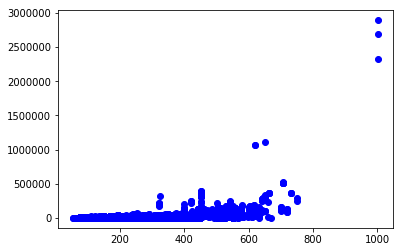

In [25]:
errors = abs(np.exp(y) - np.exp(y_hat))
print('Total absolute error', sum(errors))
plt.plot(x, errors,  'bo')

# Create a new feature called Age

In [26]:
current_year = pd.to_datetime("now").year
df['age'] = current_year - df['Year']
df.age.value_counts().head()

5    2152
4    2135
3    1649
6     579
8     386
Name: age, dtype: int64

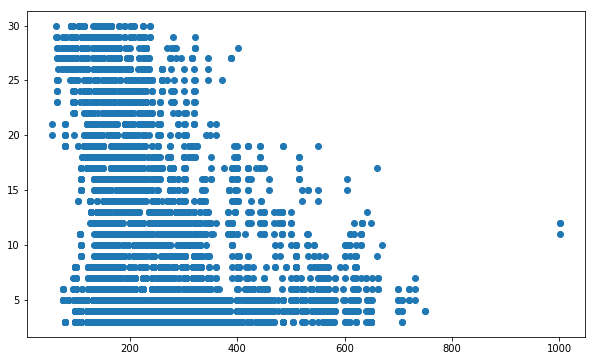

In [27]:
features = ['age']
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['Engine HP'], y = df['age'])

In [28]:
# 1) Run Model with each individual of feature
y = df['MSRP']
X = df['Year']
X_2 = sm.add_constant(X)
model = sm.OLS(y, X_2)
results = model.fit()
print(results.summary())
print('R2: ', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     643.8
Date:                Wed, 16 Dec 2020   Prob (F-statistic):          2.41e-138
Time:                        09:19:39   Log-Likelihood:            -1.4652e+05
No. Observations:               11816   AIC:                         2.930e+05
Df Residuals:                   11814   BIC:                         2.931e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.59e+06   1.43e+05    -25.090      0.0